#Clusterização com modelo de agrupamento hierárquico: base artificial

## Importação das bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import numpy as np

#seed
seed = 0
np.random.seed(seed)

## Carregar base de dados

In [2]:
df = pd.read_csv('artificialData.csv', header=None)
df.head()

,0,1
0,-0.28528,1.7837
1,-0.19421,1.2321
2,-0.97301,1.8227
3,-0.18662,1.2104
4,-0.46764,1.2175


In [3]:
df.shape

(800, 2)

##Visualizar base

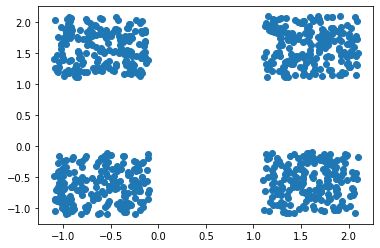

In [4]:
plt.scatter(x=df[0], y=df[1])
plt.show()

##Rodar o agrupamento aglomerativo e analisar o dendograma

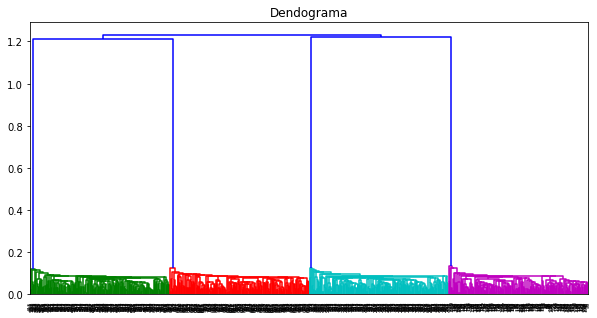

In [6]:
plt.figure(figsize=(10, 5))
plt.title("Dendograma")
dend = shc.dendrogram(shc.linkage(df))

In [7]:
model = AgglomerativeClustering(n_clusters=4, linkage='single')
model = model.fit(df)

In [ ]:
# Grupos de cada registro da base
model.labels_

In [9]:
# Juntar a base com seus respectivos labels
df_clusters = df.copy()
df_clusters['cluster'] = model.labels_
df_clusters.head()

,0,1,cluster
0,-0.28528,1.7837,0
1,-0.19421,1.2321,0
2,-0.97301,1.8227,0
3,-0.18662,1.2104,0
4,-0.46764,1.2175,0


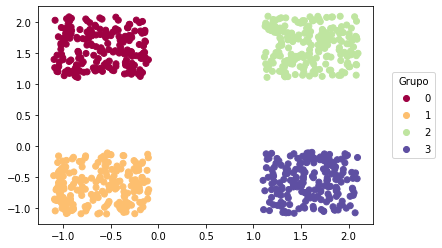

In [10]:
# Gráfico da separação dos grupos formados
fig = plt.scatter(x=df[0], y=df[1], c=model.labels_, cmap='Spectral')
handles, labels = fig.legend_elements(prop="colors")
plt.legend(handles, labels, loc='center right', bbox_to_anchor=(1.2, 0.5), title='Grupo')
plt.show()

## Vamos usar o modelo para prever o grupo de novos dados

In [11]:
new_data = [0, 1.5] ### ==> novo dado a ser inferido!!
df.loc[len(df)] = new_data
predictions = model.fit_predict(df)  # inferências para todos os dados, inclusive o novo!

In [13]:
df.tail()

,0,1
796,-1.02710,-0.75274
797,-1.01150,-1.00790
798,-0.30165,-0.95215
799,-0.15699,-0.90183
800,0.00000,1.50000


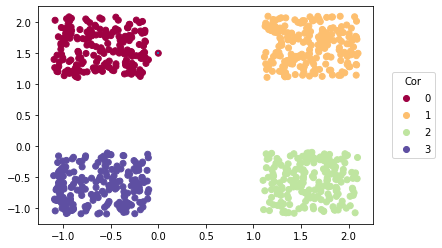

In [14]:
fig = plt.scatter(x=df[0], y=df[1], c=model.labels_, cmap='Spectral')
plt.scatter(x=new_data[0], y=new_data[1], s=[2], marker='+')
handles, labels = fig.legend_elements(prop="colors")
plt.legend(handles, labels, loc='center right', bbox_to_anchor=(1.2, 0.5), title='Cor')
plt.show()